In [39]:
import pandas as pd  
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')
print(iris.shape)
print(iris.head())
print(iris.describe())

(150, 6)
   id  sepal_len  sepal_wd  petal_len  petal_wd      species
0   0        5.1       3.5        1.4       0.2  iris-setosa
1   1        4.9       3.0        1.4       0.2  iris-setosa
2   2        4.7       3.2        1.3       0.2  iris-setosa
3   3        4.6       3.1        1.5       0.2  iris-setosa
4   4        5.0       3.6        1.4       0.2  iris-setosa
               id   sepal_len    sepal_wd   petal_len    petal_wd
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean    74.500000    5.843333    3.057333    3.758000    1.199333
std     43.445368    0.828066    0.435866    1.765298    0.762238
min      0.000000    4.300000    2.000000    1.000000    0.100000
25%     37.250000    5.100000    2.800000    1.600000    0.300000
50%     74.500000    5.800000    3.000000    4.350000    1.300000
75%    111.750000    6.400000    3.300000    5.100000    1.800000
max    149.000000    7.900000    4.400000    6.900000    2.500000


In [2]:
iris.groupby('species').size()


species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

In [3]:
iris['species'].value_counts()

iris-versicolor    50
iris-setosa        50
iris-virginica     50
Name: species, dtype: int64

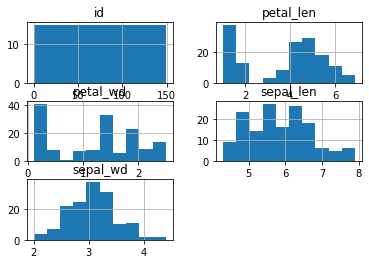

In [4]:
iris.hist()
plt.show()

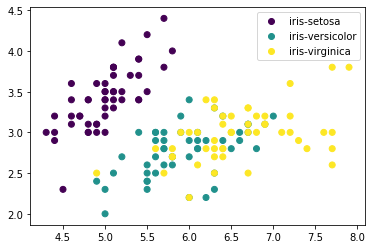

In [5]:
#build a dict mapping species to an integer code 
inv_name_dict = {'iris-setosa':0, 'iris-versicolor':1, 'iris-virginica':2 }
#build ineteg color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]
#scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel = ('sepal lenght (cm)')
plt.ylabel = ('sepal width (cm)')
##add legend 
plt.legend(handles = scatter.legend_elements()[0],labels = inv_name_dict.keys())
plt.show()

TypeError: 'str' object is not callable

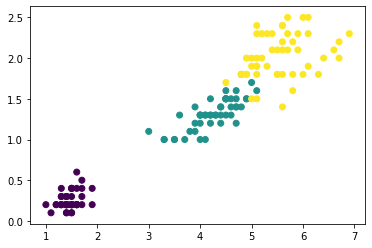

In [6]:
#scatter plot
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'], c = colors)
plt.xlabel('petal length (cm)')
plt.ylavel('petal width (cm)')
#add legend 
plt.legend(hadles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8186a08690>,
      dtype=object)

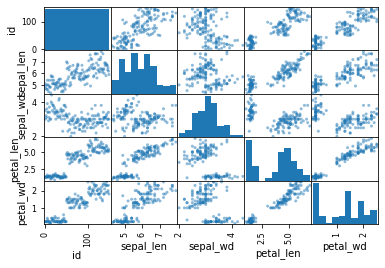

In [7]:
pd.plotting.scatter_matrix(iris)

In [8]:
X = iris[['petal_len', 'petal_wd']]
y = iris['species']
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1, stratify = y)
y_train.value_counts()
y_test.value_counts()

iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: species, dtype: int64

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5 )

In [10]:
print(knn.fit(X_train, y_train))


KNeighborsClassifier()


In [11]:
pred = knn.predict(X_test)

In [12]:
pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

In [13]:
y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12])


[[1.  0.  0. ]
 [0.  0.2 0.8]]


In [14]:
print(pred[10:12])

['iris-setosa' 'iris-virginica']


In [15]:
y_pred = knn.predict(X_test)
print((y_pred==y_test.values).sum())
print(y_test.size)

44
45


In [16]:
print((y_pred==y_test.values).sum()/y_test.size)

0.9777777777777777


In [17]:
knn.score(X_test, y_test)

0.9777777777777777

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


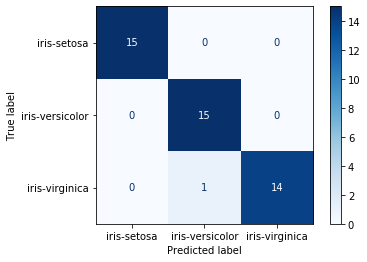

In [25]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(knn,X_test, y_test, cmap=plt.cm.Blues))


In [26]:
# Первый ряд соответствует фактической радужке-сетозе; [15, 0, 0] указывает на то,
# что 15 радужных оболочек правильно предсказаны, и ни одна из них не помечена неправильно;
# в то время как в последнем ряду [0, 1, 14] предполагается, что из 15 фактических iris-virginica, 
# 0 были предсказаны как iris-setosa, 1 было предсказано как iris-versicolor,
# а остальные 14 были правильно определены как iris-virginica.
# Это согласуется с нашим наблюдением во время анализа поисковых данных, 
# то есть было некоторое совпадение между двумя видами на диаграмме рассеяния,
# и отличить радужную оболочку от радужной оболочки глаза от ириса-virginica сложнее,
# чем идентифицировать радужку-сетозу


In [31]:
from sklearn.model_selection import cross_val_score
#creat new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 3)
#train model with 5-fold cv 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score( accuracy)
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [32]:
#then averenge them 
cv_scores.mean()

0.9533333333333334

In [40]:
from sklearn.model_selection import GridSearchCV
#creat new knn model
knn2 = KNeighborsClassifier()
# creat a dict of all values for n_neighbords 
param_grid = {'n_neighbors':np.arange(2, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv = 5 )
#fit model data
knn_gscv.fit(X, y )


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [46]:
print(knn_gscv.best_params_)

{'n_neighbors': 4}


In [47]:
print(knn_gscv.best_score_)

0.9666666666666668


In [50]:
knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)
y_pred = knn_final.predict(X)
print(knn_final.score(X, y))

0.9733333333333334


In [53]:
new_data = np.array([3.76, 1.20 ])
new_data = new_data.reshape(1, -1)
knn_final.predict(np.array(new_data))


array(['iris-versicolor'], dtype=object)

In [54]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2],[1.58, 1.2]])
knn_final.predict(new_data)

array(['iris-versicolor', 'iris-virginica', 'iris-setosa'], dtype=object)

In [55]:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix 
y_true = np.array(['cat', 'dog', 'dog',
  'cat', 'fish', 'dog', 'fish'])
y_pred = np.array(['cat', 'cat', 'cat',
  'cat', 'fish', 'dog', 'fish'])
confusion_matrix(y_true, y_pred,
  labels=['cat', 'dog', 'fish'])

array([[2, 0, 0],
       [2, 1, 0],
       [0, 0, 2]])